# **Import Libraries and modules**

In [0]:
# https://keras.io/
#!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
Label :  9


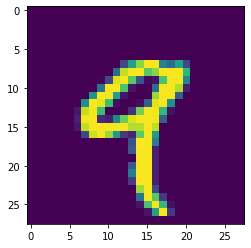

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[4])
print('Label : ',y_train[4])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, activation='relu', input_shape=(28,28,1)))  #26*26*32
model.add(Convolution2D(64, 3, activation='relu'))  #24
model.add(Convolution2D(128, 3, activation='relu'))  #22
model.add(MaxPooling2D(pool_size=(2,2)))  #11
model.add(Convolution2D(128, 3, activation='relu'))  #9
model.add(MaxPooling2D(pool_size=(2,2)))  #4
model.add(Convolution2D(128, 3, activation='relu'))  #2
model.add(Convolution2D(10, 2))
model.add(Flatten())
model.add(Activation('softmax'))

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 128)         147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 128)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [37]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 38s 633us/step - loss: 0.1123 - acc: 0.9647
Epoch 2/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.0384 - acc: 0.9885
Epoch 3/10
60000/60000 [==============================] - 33s 545us/step - loss: 0.0273 - acc: 0.9916
Epoch 4/10
60000/60000 [==============================] - 33s 549us/step - loss: 0.0212 - acc: 0.9935
Epoch 5/10
60000/60000 [==============================] - 33s 548us/step - loss: 0.0174 - acc: 0.9945
Epoch 6/10
60000/60000 [==============================] - 33s 542us/step - loss: 0.0139 - acc: 0.9954
Epoch 7/10
60000/60000 [==============================] - 33s 542us/step - loss: 0.0120 - acc: 0.9960
Epoch 8/10
60000/60000 [==============================] - 33s 543us/step - loss: 0.0097 - acc: 0.9971
Epoch 9/10
60000/60000 [==============================] - 33s 544us/step - loss: 0.0088 - acc: 0.9973
Epoch 10/10
60000/60000 [==============================] - 33s 543us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [39]:
print(score)

[0.02711409723036495, 0.9933]


In [0]:
y_pred = model.predict(X_test)

In [41]:
print(y_pred[:9])
print(y_test[:9])

[[1.41350820e-12 4.19557401e-12 1.03539996e-12 7.39238726e-10
  2.58860177e-16 3.35978295e-14 1.54225838e-20 1.00000000e+00
  1.78639099e-13 1.37836513e-11]
 [6.42732059e-22 5.87019040e-13 1.00000000e+00 9.48804183e-19
  2.17575765e-17 6.45798268e-25 8.23825491e-13 2.24995794e-18
  3.80742431e-21 3.09100650e-25]
 [2.54176626e-08 9.99998212e-01 3.84515886e-08 1.31202146e-10
  2.38933694e-07 7.78609888e-07 2.42537972e-08 5.86846284e-07
  7.06100778e-08 2.31895170e-09]
 [9.99998927e-01 2.68507837e-11 2.68547073e-09 1.35547462e-09
  1.26165606e-10 4.46298026e-10 1.08447125e-06 1.58322300e-10
  3.11373566e-11 4.79433160e-09]
 [6.77372798e-15 2.17848014e-11 9.31036381e-16 3.41679194e-16
  1.00000000e+00 4.34355361e-15 1.98196003e-14 4.22532941e-15
  3.88104132e-12 5.81825144e-11]
 [1.15095256e-09 1.00000000e+00 7.18394499e-09 4.32867907e-13
  1.43500127e-08 1.54803246e-08 7.68774600e-10 3.11839599e-09
  2.07109707e-08 5.21773527e-11]
 [1.01877735e-16 1.97110754e-08 8.74215769e-11 4.23695841e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

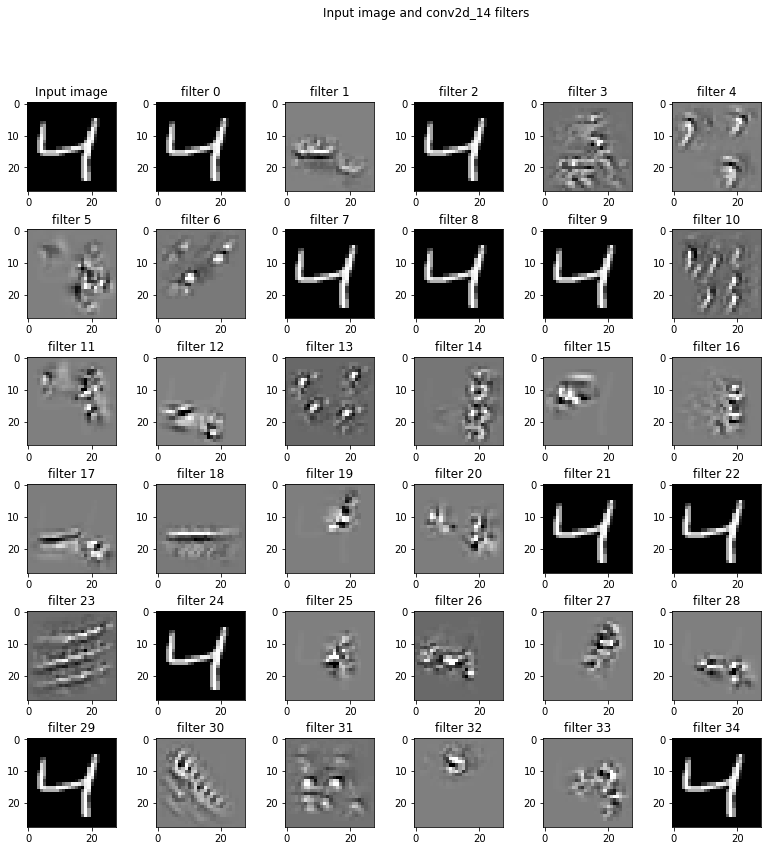

In [44]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()